In [4]:
import pickle
import _pickle as cPickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm
import numpy as np
params_dist = {}

__________________________________________________
['google_workplaces']


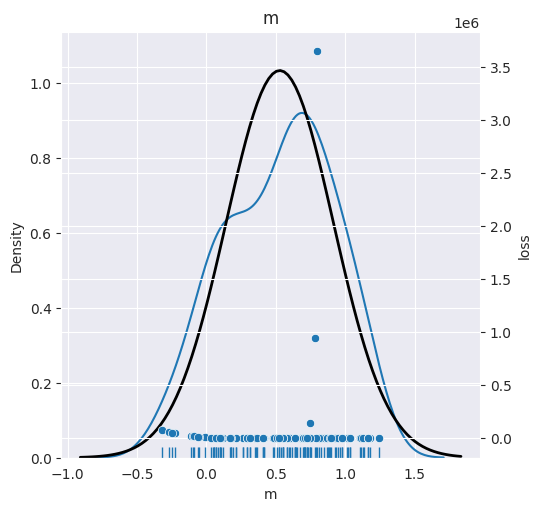

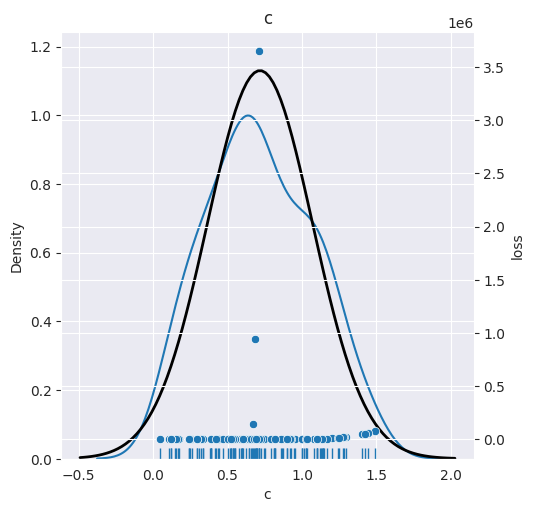

__________________________________________________
['google_residential']


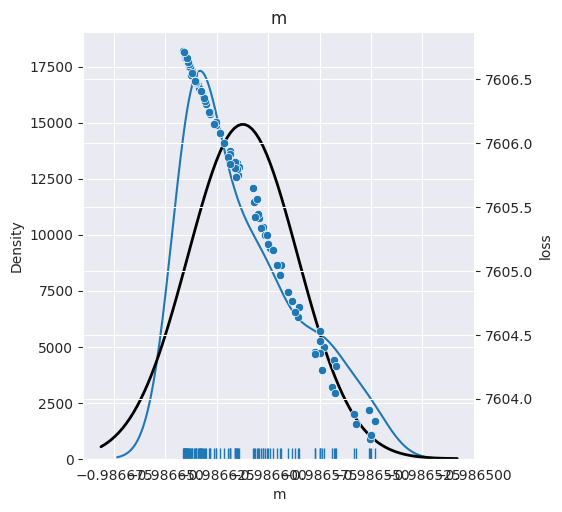

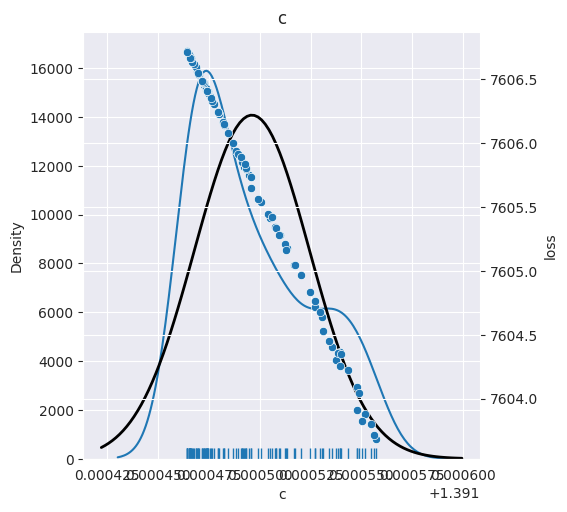

__________________________________________________
['google_transit']


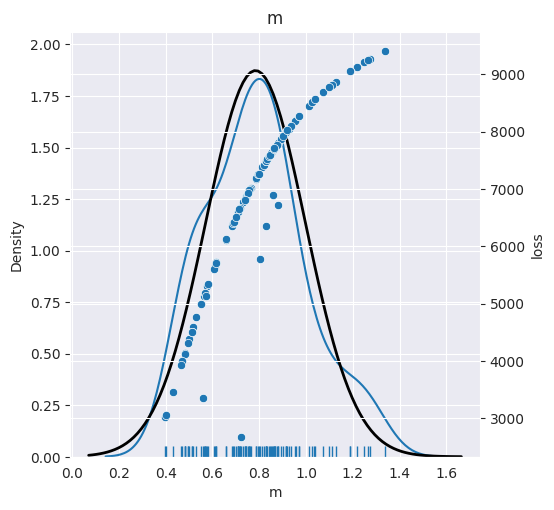

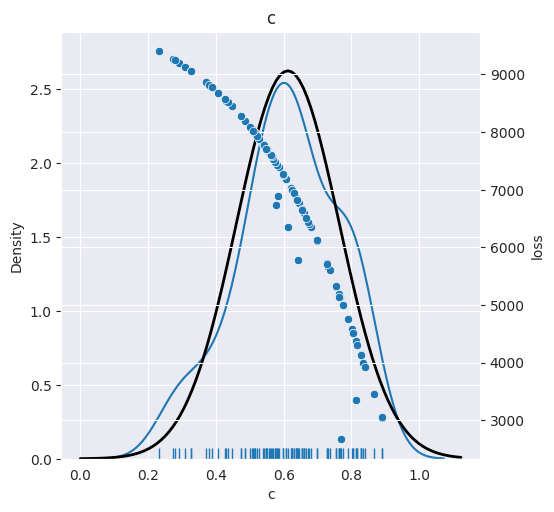

__________________________________________________
None


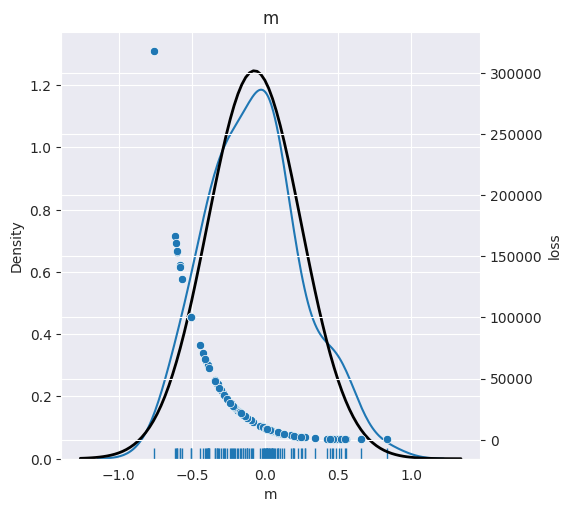

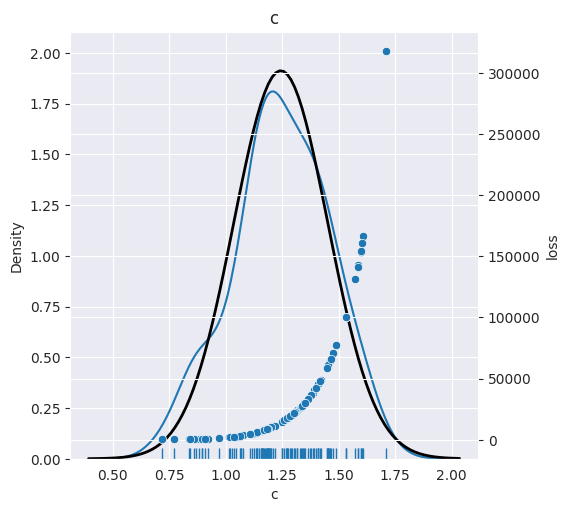

__________________________________________________
['F0_cautious_behaviour']


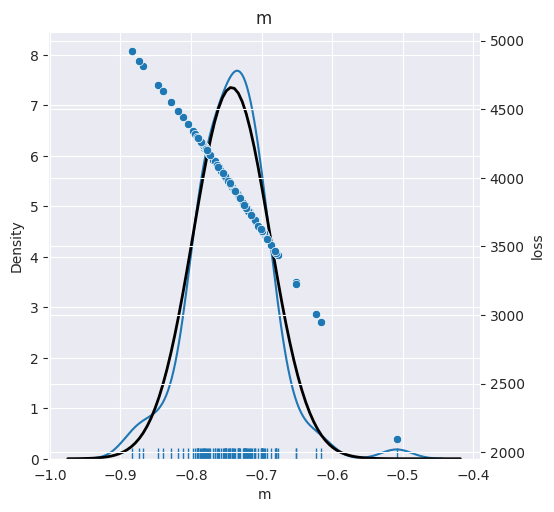

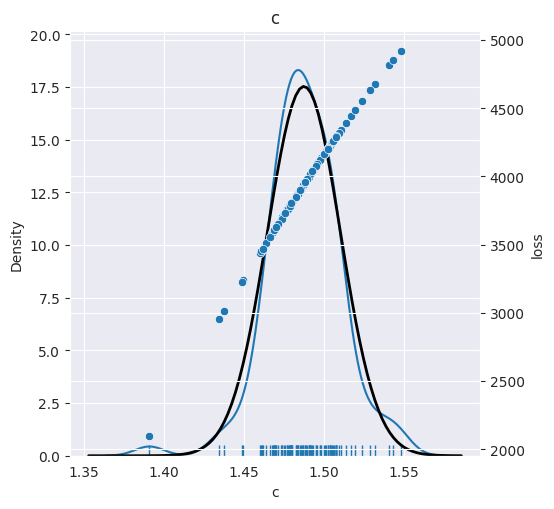

__________________________________________________
['F1_perception_advice']


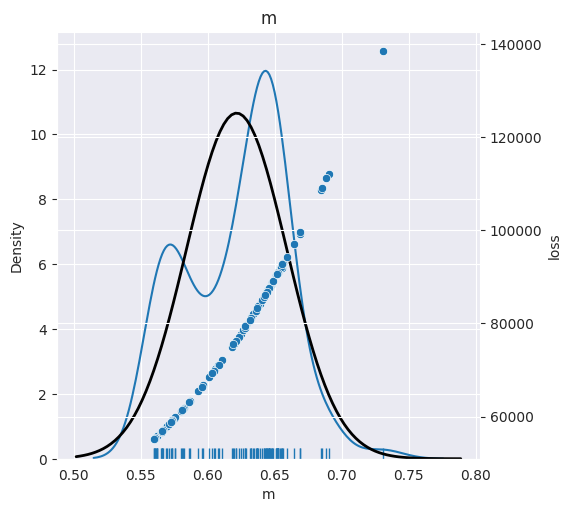

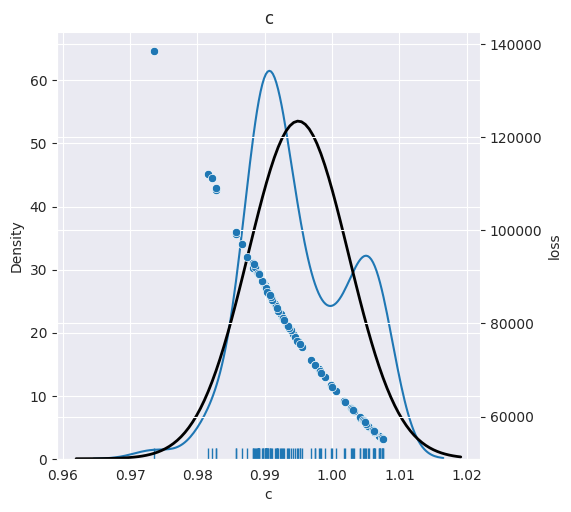

__________________________________________________
['F2_applicability_usefullness_advice']


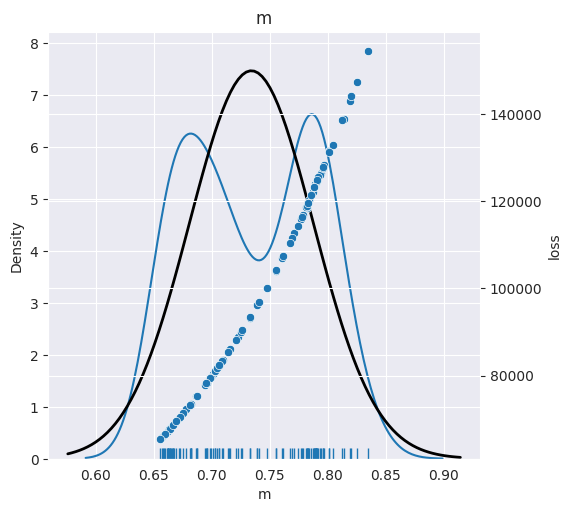

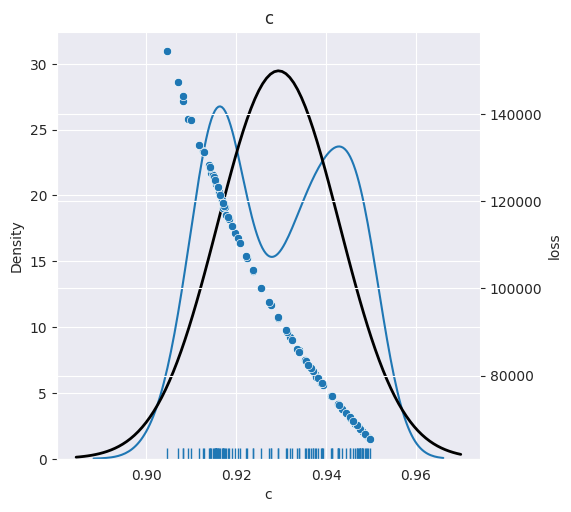

__________________________________________________
['F3_behaviour_others']


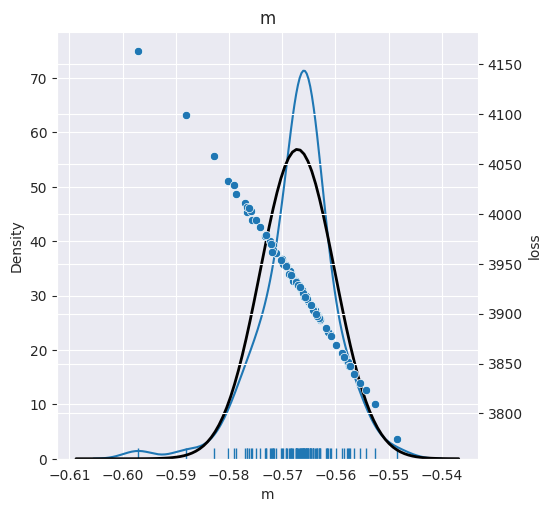

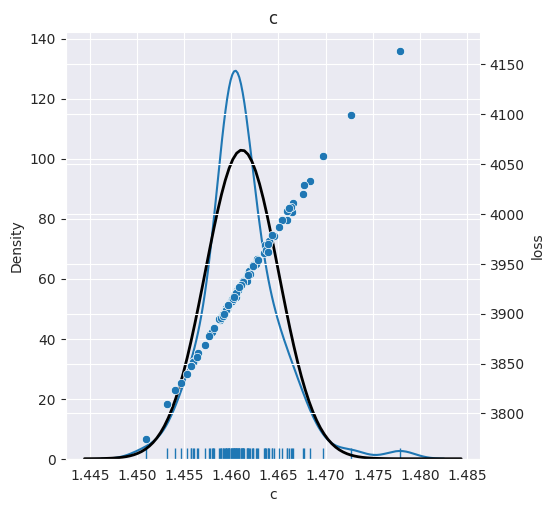

__________________________________________________
['F4_consequence_advice']


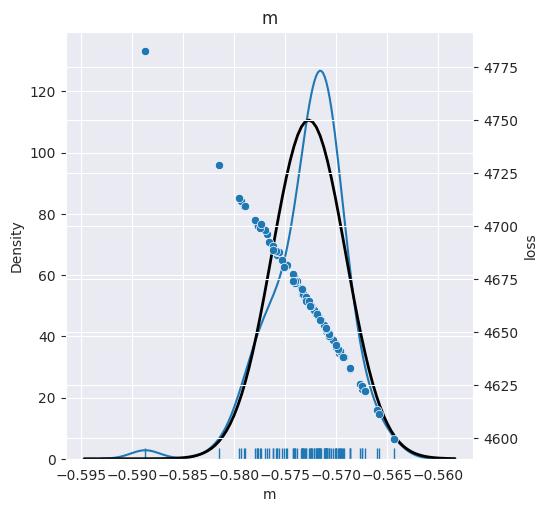

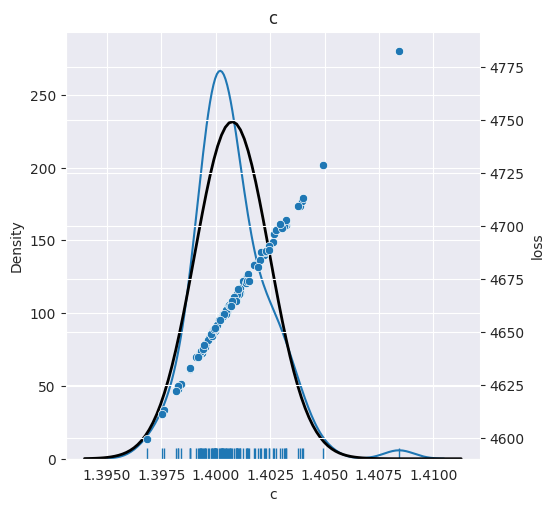

In [5]:
import os
dir_path = "../split_tests/split_test_prior/"

for filename in os.listdir(dir_path):
    with open(dir_path+filename, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        info_dict = pickle.load(f)
    for factor in info_dict.keys():
        params_dist[factor] = {}
        print('_'*50)
        print(factor)
        m_list = []
        c_list = []
        alpha_list = []
        phi_list = []
        loss_list = []
        for meta_epoch in info_dict[factor]['meta_epoch_params'].keys():
            m, c = info_dict[factor]['meta_epoch_params'][meta_epoch]['lin_params']
            m = m.item()
            c = c.item()
            alpha = info_dict[factor]['meta_epoch_params'][meta_epoch]['alpha'].item()
            phi = info_dict[factor]['meta_epoch_params'][meta_epoch]['phi'].item()
            loss = info_dict[factor]['meta_epoch_test_mse'][meta_epoch]
            m_list.append(m)
            c_list.append(c)
            alpha_list.append(alpha)
            phi_list.append(phi)
            loss_list.append(loss)
        df = pd.DataFrame({'m':m_list, 'c':c_list, 'alpha':alpha_list, 'phi':phi_list, 'loss':loss_list})

        # Plots
        for col in df.columns[:-3]:
            # Fit a normal distribution to the data:
            mu, std = norm.fit(df[col])
            params_dist[factor][col] = (mu, std)
            sns.displot(df[col], rug=True, kind='kde')#, kde=True)
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            plt.plot(x, p, 'k', linewidth=2)
            ax2 = plt.twinx()
            sns.scatterplot(data=df, x=col, y='loss', ax=ax2)
            plt.title(col)
            plt.show()
        fig = px.scatter_3d(df, x='m', y='c', z='alpha', color='phi', size='loss')
        fig.write_html(f"plots_html/{filename}{factor}.html")

In [6]:
import _pickle as cPickle

#with open(r"linear_param_norm.pickle", "wb") as output_file:
#    cPickle.dump(params_dist, output_file)